In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=120)

In [2]:
survey_1 = 'SDSS'
survey_2 = 'LSST_DESI'
deltaz = 0.17 # LSST deltaz
StoNstat_Blazek_withCV_SNanalytic_survey=LSST_DESIrpts=2000_ahAistopgap_deltaz=0.17

This notebook makes a 2D plot of the ratio of statistical-only signal to noise from the Blazek et al case and from the shape-measurement case as a function of a and the percentage covaraince between methods.

In [4]:
# Load StoN from Blazek method for each survey under consideration (only one value). We actually saved the square of what we want.
StoNsq_Blazek_1 = np.loadtxt('../txtfiles/StoNstat_Blazek_withCV_SNanalytic_survey='+survey_1+'rpts=2000_ahAistopgap_deltaz='+str(deltaz)+'.txt')
StoNsq_Blazek_2 = np.loadtxt('../txtfiles/StoNstat_Blazek_withCV_SNanalytic_survey='+survey_2+'rpts=2000_ahAistopgap_deltaz='+str(deltaz)+'.txt')
StoN_Blazek_1 = np.sqrt(StoNsq_Blazek_1)
StoN_Blazek_2 = np.sqrt(StoNsq_Blazek_2)
print "StoN Blazek, SDSS=", StoN_Blazek_1, "and LSST+DESI=", StoN_Blazek_2

StoN Blazek, SDSS= 0.50608799339 and LSST+DESI= 2.13094721016


In [5]:
# Load vectors of a and the percentage covariance between methods for the shape measurement case
a_1 = np.loadtxt('../txtfiles/a_StoNstat_survey='+survey_1+'.txt')
covperc_1 = np.loadtxt('../txtfiles/cov_perc_StoNstat_survey='+survey_1+'.txt')
a_2 = np.loadtxt('../txtfiles/a_StoNstat_survey='+survey_2+'.txt')
covperc_2 = np.loadtxt('../txtfiles/cov_perc_StoNstat_survey='+survey_2+'.txt')

# Load the matrix of StoN values from the shape-measurement method at each pair of a / % covariance values
StoNsq_shapes_1 = np.loadtxt('../txtfiles/StoNsq_shapes_withCV_survey='+survey_1+'_rpts=2500_Ai_ah_stopgap.txt')
StoN_shapes_1 = np.sqrt(StoNsq_shapes_1)
StoNsq_shapes_2 = np.loadtxt('../txtfiles/StoNsq_shapes_withCV_survey='+survey_2+'_rpts=2500_Ai_ah_stopgap.txt')
StoN_shapes_2 = np.sqrt(StoNsq_shapes_2)

difference= [[        inf  1.5779492   1.57804457  1.57817163  1.57834935  1.57861554  1.57905819  1.57993973  1.58255465]
 [        inf         inf         inf  1.57817163  1.57834935  1.57861554  1.57905819  1.57993973  1.58255465]
 [        inf         inf         inf         inf  1.57834935  1.57861554  1.57905819  1.57993973  1.58255465]
 [        inf         inf         inf         inf         inf         inf  1.57905819  1.57993973  1.58255465]
 [        nan         nan         nan         inf         inf         inf         inf  1.57993973  1.58255465]
 [        nan         nan         nan         nan         nan         inf         inf         inf  1.58255465]
 [        nan         nan         nan         nan         nan         nan         nan         inf         inf]
 [        nan         nan         nan         nan         nan         nan         nan         nan         inf]
 [        nan         nan         nan         nan         nan         nan         nan         nan   

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in divide


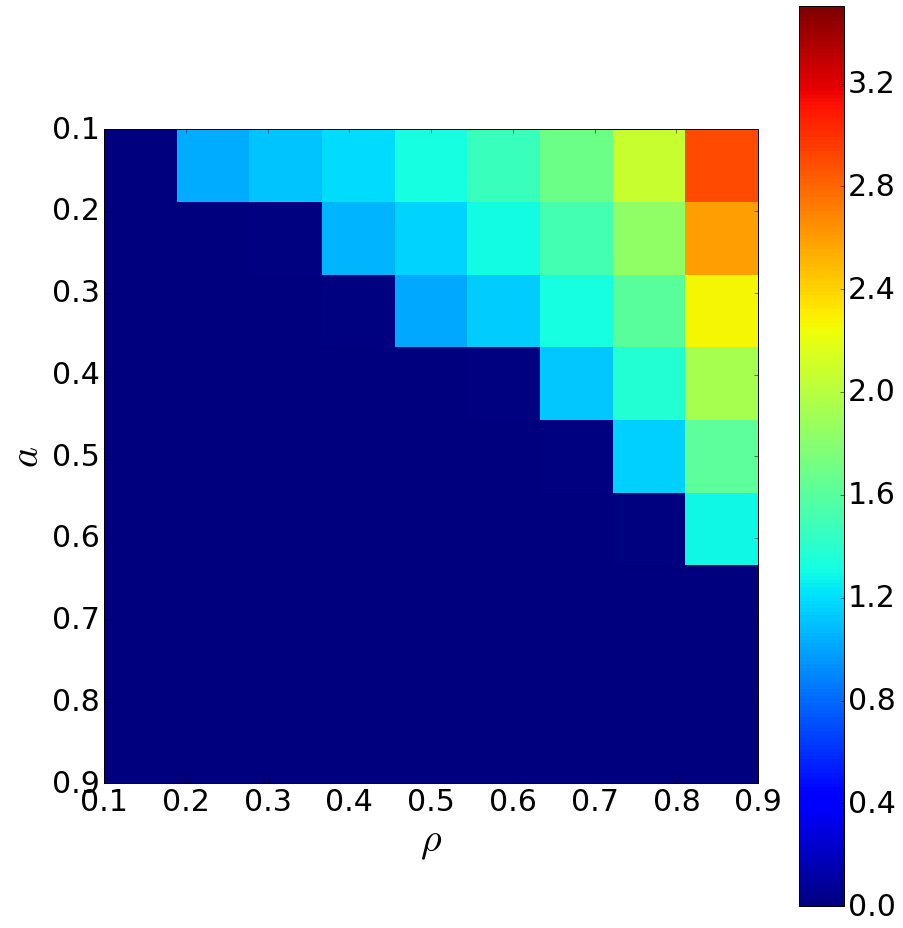

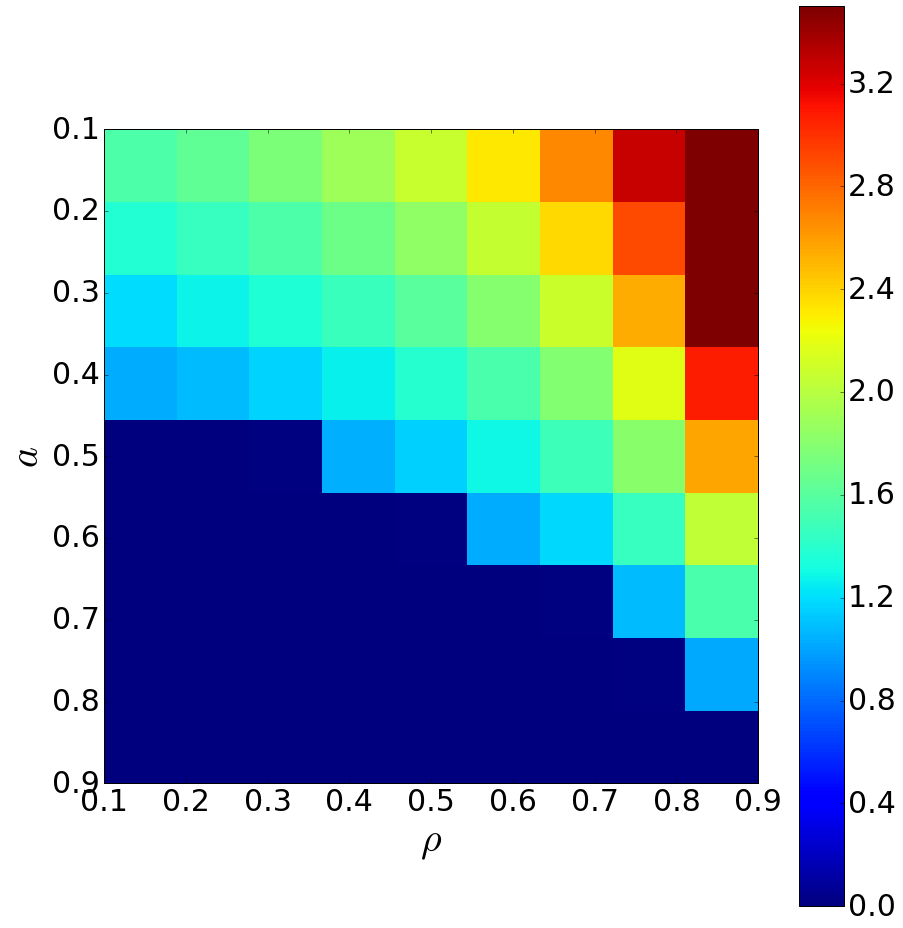

In [17]:
# Make a 2D colour plot of the ratio of the S to N values for each survey
# If the value plotted is greater than 1, the shape measurment does better for that combination of a and % cov.

StoNratio_1 = StoN_shapes_1 / StoN_Blazek_1

# Uncomment this piece of code to more easily see where the shape-measurement method "wins" in parameter space.
for i in range(0,len(a_1)):
    for j in range(0,len(covperc_1)):
        if StoNratio_1[i,j]< 1.0:
            StoNratio_1[i,j] =0

plt.figure(figsize=(13, 13))
plt.imshow(StoNratio_1, extent=[covperc_1[0], covperc_1[-1], a_1[-1], a_1[0]], aspect=1, interpolation='None')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize='30')
plt.clim(0,3.5)
plt.xlabel('$\\rho$', fontsize=40)
plt.ylabel('$a$', fontsize=40)
plt.tick_params(axis='both', labelsize='30')
#plt.title('(Stat S/N, shapes method) / (Stat S/N, Blazek method), SDSS', fontsize=20)
#plt.show()
plt.tight_layout()
plt.savefig('../plots/StoN_2d_stat_'+survey_1+'_withCV_NAM_rpts2500_BlackOut.jpg')

StoNratio_2 = StoN_shapes_2 / StoN_Blazek_2

# Uncomment this piece of code to more easily see where the shape-measurement method "wins" in parameter space.
for i in range(0,len(a_2)):
    for j in range(0,len(covperc_2)):
        if StoNratio_2[i,j]< 1.0:
            StoNratio_2[i,j] =0

plt.figure(figsize=(13, 13))
plt.imshow(StoNratio_2, extent=[covperc_2[0], covperc_2[-1], a_2[-1], a_2[0]], aspect=1, interpolation='None')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize='30')
plt.clim(0,3.5)
plt.xlabel('$\\rho$', fontsize=40)
plt.ylabel('$a$', fontsize=40)
plt.tick_params(axis='both', labelsize='30')
#plt.title('(Stat S/N, shapes method) / (Stat S/N, Blazek method), LSST+DESI', fontsize=20)
#plt.show()
plt.tight_layout()
plt.savefig('../plots/StoN_2d_stat_'+survey_2+'_withCV_NAM_deltaz='+str(deltaz)+'_BlackOut.jpg')

# These ratios should be off by a value independent of a / covperc. What is it?
print "difference=", StoNratio_2 / StoNratio_1